In [24]:
# Standard Libraries
import os
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Plotting settings
sns.set_theme(style="darkgrid")
%matplotlib inline               



C:\Users\Mayur\AppData\Local\Temp\ipykernel_61048\22861003.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


MultiIndex([(  'Date',     ''),
            ( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


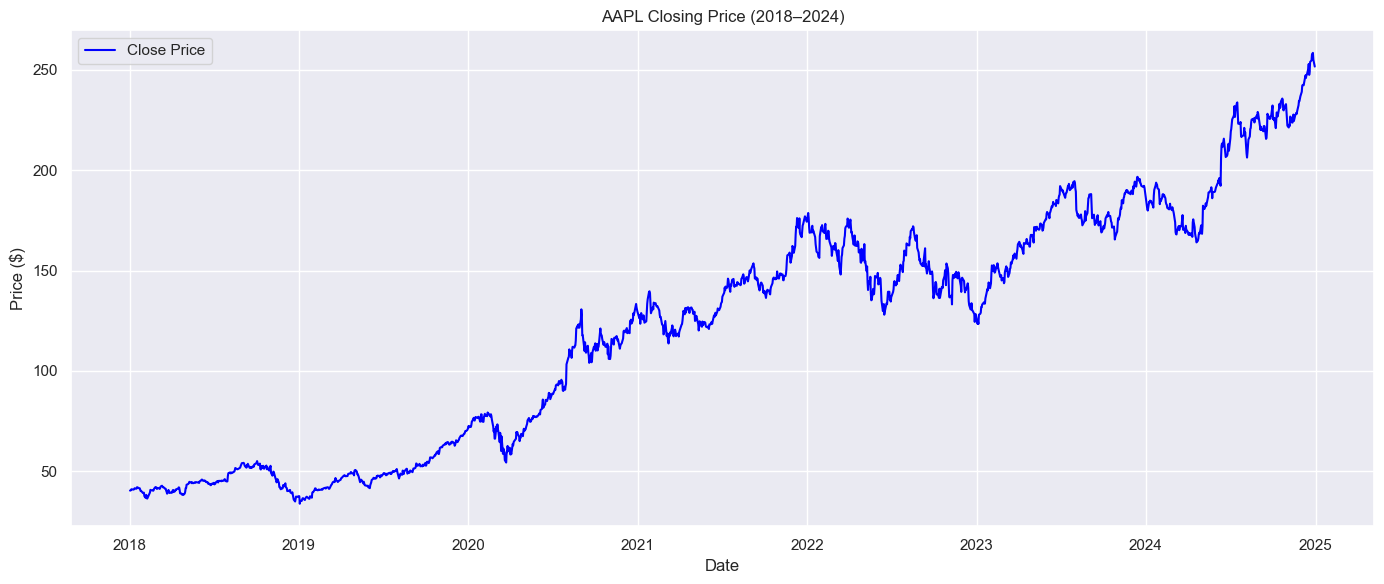

In [27]:


# Step 1: Download fresh data with 'Date'
ticker = 'AAPL'
start_date = '2018-01-01'
end_date = '2024-12-31'

df = yf.download(ticker, start=start_date, end=end_date)

# Step 2: Reset index to keep 'Date' as a column
df.reset_index(inplace=True)

# Step 3: Confirm 'Date' column exists
print(df.columns)  # ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Step 4: Convert 'Date' to datetime (safe check)
df['Date'] = pd.to_datetime(df['Date'])

# Step 5: Set 'Date' as index for time-series ops
df.set_index('Date', inplace=True)

# Step 6: Optional - Create folder and save cleaned CSV with 'Date' as a column
os.makedirs('../data/processed', exist_ok=True)

#  Save with Date as a column, NOT as index
df.reset_index().to_csv('../data/processed/AAPL_stock_data_cleaned.csv', index=False)

# Step 7: Plot closing price
sns.set_theme(style="darkgrid")
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.title('AAPL Closing Price (2018–2024)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()



In [28]:
print(df.head())
print(df.index.name)  # Should be 'Date'
print(df.dtypes)      # 'Close' should be float64


Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.426823  40.436212  39.722768  39.933986  102223600
2018-01-03  40.419781  40.964251  40.356418  40.490187  118071600
2018-01-04  40.607533  40.710794  40.384583  40.492536   89738400
2018-01-05  41.069870  41.156702  40.612235  40.703762   94640000
2018-01-08  40.917320  41.213022  40.818749  40.917320   82271200
Date
Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object
